<a href="https://colab.research.google.com/github/umair594/VirtualInternship-Rhombix_Technologies/blob/main/Titanic_Classification_task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TITANIC CLASSIFICATION

**Goal:**

Build a system that predicts whether a person survived
the Titanic disaster based on features like age, gender,
socio-economic status (class), and more.

Description & Data Overview

Data Loading & Cleaning

Exploratory Data Analysis (EDA)

Feature Engineering

Model Training & Evaluation

Results & Conclusion

**Step 01: Import Libraries**

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Step 02: Data Description & Overview**

Dataset Source: Titanic dataset from Kaggle

**Description:**

PassengerId: Unique ID for each passenger
Survived: 0 = Did not survive, 1 = Survived
Pclass: Ticket class (1 = upper, 2 = middle, 3 = lower)
Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

**Step 03: Load The Dataset**

In [2]:
# Load the dataset
data = sns.load_dataset("titanic")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [6]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Step 04: Data Cleaning**

In [7]:
# Drop irrelevant columns
data = data.drop(['deck', 'embark_town', 'alive', 'class', 'adult_male', 'who'], axis=1)

# Fill missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Encode categorical data
label_enc = LabelEncoder()
data['sex'] = label_enc.fit_transform(data['sex'])
data['embarked'] = label_enc.fit_transform(data['embarked'])

/tmp/ipython-input-658422773.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
/tmp/ipython-input-658422773.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

**Step 05: Exploratory Data Analysis (EDA)**

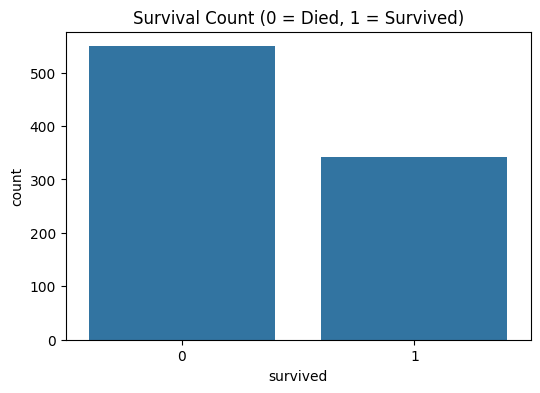

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=data)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


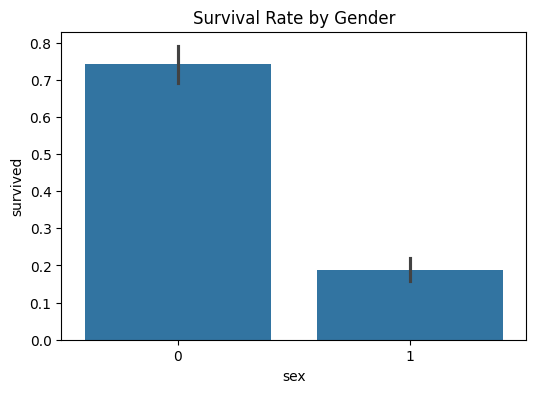

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='survived', data=data)
plt.title("Survival Rate by Gender")
plt.show()

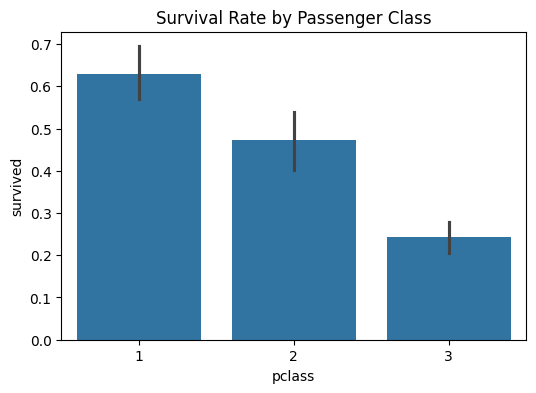

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x='pclass', y='survived', data=data)
plt.title("Survival Rate by Passenger Class")
plt.show()

**Step 06:Feature Selection & Splitting**

In [11]:
# Select important features
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = data[features]
y = data['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 07: Model Training**

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Step 08: Evaluation**

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
print("\n Model Accuracy:", round(accuracy * 100, 2), "%")
print("\n Confusion Matrix:\n", cm)
print("\n Classification Report:\n", report)


 Model Accuracy: 82.12 %

 Confusion Matrix:
 [[92 13]
 [19 55]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**Step 09: Feature Importance**

In [15]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\n Feature Importance:\n", importances)


 Feature Importance:
 sex         0.271410
fare        0.265010
age         0.249995
pclass      0.086957
sibsp       0.053685
parch       0.039897
embarked    0.033044
dtype: float64


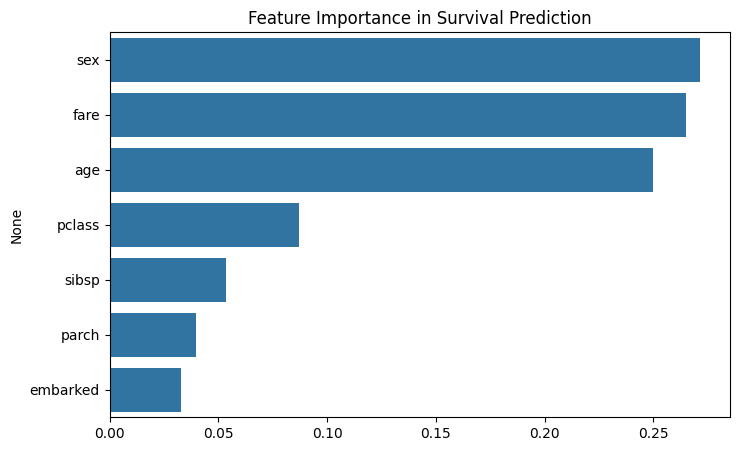

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance in Survival Prediction")
plt.show()

**STep 10: Results**

In [17]:
print("""RESULTS

The Random Forest model achieved an accuracy of about {:.2f}%.
Key factors affecting survival:
   1. Sex (Females had a much higher chance of survival)
   2. Passenger Class (Higher class = higher survival rate)
   3. Fare (Higher fares correlated with better survival)
   4. Age (Children had slightly better chances)

In summary, socio-economic status and gender were the most
influential factors determining survival on the Titanic.
""".format(accuracy * 100))

RESULTS

The Random Forest model achieved an accuracy of about 82.12%.
Key factors affecting survival:
   1. Sex (Females had a much higher chance of survival)
   2. Passenger Class (Higher class = higher survival rate)
   3. Fare (Higher fares correlated with better survival)
   4. Age (Children had slightly better chances)

In summary, socio-economic status and gender were the most 
influential factors determining survival on the Titanic.

